In [1]:
import numpy as np
from numpy.linalg import inv
from numpy import dot
import scipy.io as sio
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_excel('data_sarpolzahab.xlsx')
pga = data['PGA (cm/s2)'].values
rj = data['R_jb (km)'].values
vs_30 = data['Vs_30 (m/s)'].values

Sa = np.zeros(vs_30.size)
Ss = np.zeros(vs_30.size)

msk = vs_30 < 360
# sa[msk] = 0
Ss[msk] = 1

msk = np.logical_and(360<vs_30, vs_30<750)
Sa[msk] = 1
# ss[msk] = 0

# msk = vs_30>750
# sa[msk] = 0
# ss[msk] = 0
N = Sa.size

[[1.         1.59106461 0.         1.        ]
 [1.         1.67209786 1.         0.        ]
 [1.         1.72427587 0.         1.        ]
 [1.         1.81954394 1.         0.        ]
 [1.         1.81954394 0.         1.        ]
 [1.         1.8260748  0.         0.        ]
 [1.         1.84509804 1.         0.        ]
 [1.         1.84509804 1.         0.        ]
 [1.         1.84509804 0.         0.        ]
 [1.         1.91907809 1.         0.        ]
 [1.         1.96848295 1.         0.        ]
 [1.         1.96848295 1.         0.        ]
 [1.         1.98227123 0.         0.        ]
 [1.         1.99122608 0.         1.        ]
 [1.         2.00432137 1.         0.        ]
 [1.         2.02530587 1.         0.        ]
 [1.         2.05307844 0.         1.        ]
 [1.         2.05690485 0.         1.        ]
 [1.         2.06445799 0.         1.        ]
 [1.         2.07918125 1.         0.        ]
 [1.         2.08635983 1.         0.        ]
 [1.         

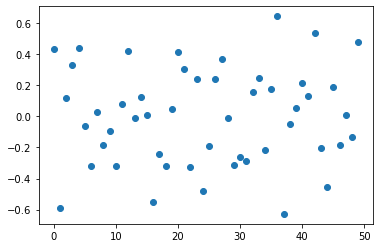

In [3]:
#Build the parabolic system matrix
G = np.ones(shape=(N, 4))
G[:, 1] = np.log10(rj)
G[:, 2] =  Ss
G[:,3] = Sa
print(G)

#solving least square
y = np.log10(pga)
m_l1 = np.linalg.inv(np.dot(G.T, G))
m_l2 = np.dot(G.T, y)
ml = np.dot(m_l1, m_l2)
print(ml)
r_1 = (y-np.dot(G,ml))
plt.plot(r_1,'o')
# plt.hist(r_1)

In [4]:
r = (y-np.dot(G,ml))

#degree_of_freedom=dof
dof = N - 4

norm_r = np.linalg.norm(r)
std = norm_r / np.sqrt(dof)
print(std)


0.3221304321800436


In [5]:
# Monte Carlo Section
y0 = np.dot(G, ml) 
chimc = np.zeros(1000)
mmc = np.zeros((1000, 4))
r_mmc = []
for nreal in range(0, 1000):
    ytrial = y0 + np.random.randn(N)
    mmc[nreal, :] = np.linalg.lstsq(G, ytrial)[0]
    chimc[nreal]= np.linalg.norm((np.dot(G, mmc[nreal,:])-ytrial)) ** 2
    r_mmc.append((np.linalg.norm(ytrial - np.dot(G, mmc[nreal])))**2)
print(len(r_mmc))

1000


/tmp/ipykernel_9957/3326479009.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  mmc[nreal, :] = np.linalg.lstsq(G, ytrial)[0]


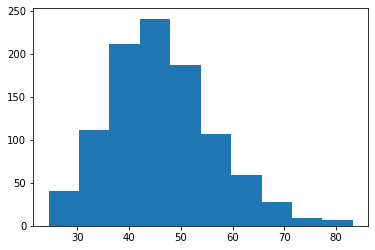

In [6]:
fig1 = plt.figure()
# plt.hist(chimc, 30)
plt.hist(r_mmc)
mean = np.mean(r_mmc)


Displaying Monte-Carlo Model Histograms
std 1.7573635157423708, 0.8133036473123926, 0.3641103416264466, 0.36980997546790323
mean 4.7775527883636615, -1.5584638958974715, 0.16027243441979158, 0.1178717299211641


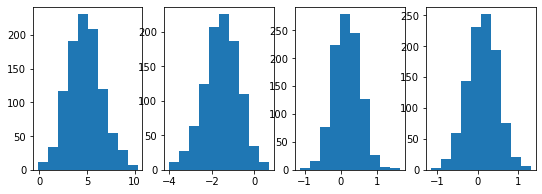

In [8]:
###Plot the histograms of the model parameters
fig3, axs = plt.subplots(1, 4, figsize=(9, 3))

ax1, ax2, ax3,ax4 = axs

ax1.hist(mmc[:, 0])
std_1 = mmc[:, 0].std()
mean_1 = mmc[:, 0].mean()

ax2.hist(mmc[:, 1])
std_2 = mmc[:, 1].std()
mean_2 = mmc[:, 1].mean()

ax3.hist(mmc[:, 2])
std_3 = mmc[:, 2].std()
mean_3 = mmc[:, 2].mean()

ax4.hist(mmc[:, 3])
std_4 = mmc[:, 3].std()
mean_4 = mmc[:, 3].mean()
print('Displaying Monte-Carlo Model Histograms')
print(f"std {std_1}, {std_2}, {std_3}, {std_4}")
print(f"mean {mean_1}, {mean_2}, {mean_3}, {mean_4}")
